In [16]:
import pandas as pd
import numpy as np
np.random.seed(5)

In [17]:
train = pd.read_csv('../Data/basketball_train.csv')
test = pd.read_csv('../Data/basketball_test.csv')

---
### 최적의 k찾기 (교차검증 - cross validation)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증

In [19]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 지정
max_k_range = train.shape[0] // 2
max_k_range

40

In [20]:
# 최적의 k를 찾기 위해 범위 확인
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [21]:
# 점수 저장 및 Train Data 정의
cross_val_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

In [22]:
# 교차 검증 (10-fold)
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(
        knn,
        x_train,
        y_train,
        cv=10, # cv : cross validation(교차검증 횟수)
        scoring='accuracy'
    )
    cross_val_scores.append(score.mean())
cross_val_scores

[0.9,
 0.9125,
 0.9,
 0.9,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.8875,
 0.875,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8375]

In [23]:
# 가장 예측력이 높은 k를 선정
cvs = cross_val_scores
k_list[cvs.index(max(cross_val_scores))]

13

In [24]:
import matplotlib.pyplot as plt

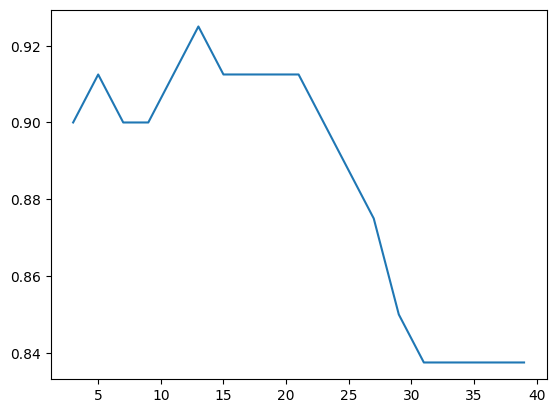

In [25]:
plt.plot(k_list, cross_val_scores)
plt.show()

---
### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [26]:
knn = KNeighborsClassifier(n_neighbors=13)

In [27]:
x_train = train[['3P','BLK']]
y_train = train['Pos']

In [30]:
x_test = test[['3P','BLK']]
y_test = test['Pos']

In [28]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [31]:
knn.score(x_test, y_test)

0.95

In [32]:
pred = knn.predict(x_test)

In [33]:
comparision = pd.DataFrame(
    {
        '예측값' : pred,
        '정답' : y_test
    }
)

In [34]:
comparision

,예측값,정답
0,SG,SG
1,C,C
2,SG,SG
3,SG,SG
4,SG,SG
5,C,C
6,SG,C
7,SG,SG
8,C,C
9,SG,SG


In [35]:
# 2개의 특징으로 예측하기 (3점슛, 블로킹) - Confusion Maetrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

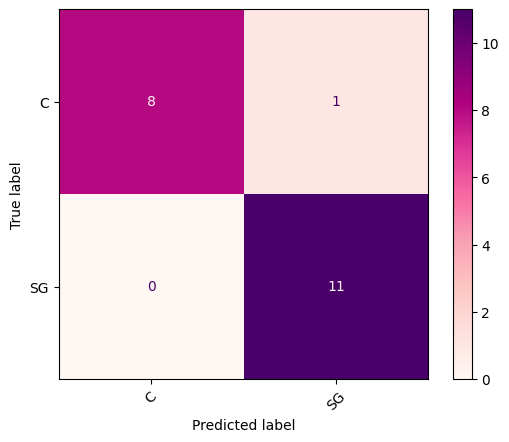

In [36]:
confusion_matrix1 = confusion_matrix(y_test, pred)
target_name = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.RdPu,
    xticks_rotation=45
)
plt.show()

---
### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [37]:
x_train = train[['3P','BLK','TRB']]
y_train = train['Pos']
x_test = test[['3P','BLK','TRB']]
y_test = test['Pos']

In [38]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9

In [39]:
pred = knn.predict(x_test)

In [40]:
comparision = pd.DataFrame(
    {
        '예측값' : pred,
        '정답' : y_test
    }
)

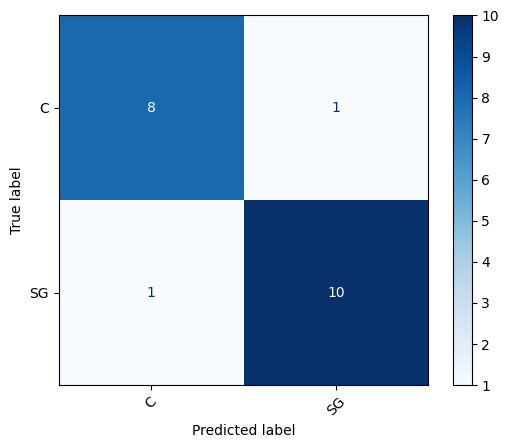

In [43]:
confusion_matrix1 = confusion_matrix(y_test, pred)
target_name = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=45
)
plt.show()

In [47]:
knn.predict([[3.4,0.5,3.7]])

/Users/jyh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['SG'], dtype=object)